<a href="https://colab.research.google.com/github/samsomsabu/machine_learning/blob/ADVANCED-ML/2348546_AML_lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.linear_model import LinearRegression


In [2]:
df = pd.read_csv('/content/Program_4_Dataset - Program_4_Dataset.csv')

In [3]:
df.head()

,index,OS_Time_Stamp,Temperature,Pressure,Humidity,TimeStamp
0,0,1456761674,17.7,1015.2,76.4,2016-03-01 00:01:14+08:00
1,1,1456761733,17.7,1015.3,76.4,2016-03-01 00:02:13+08:00
2,2,1456761792,17.7,1015.3,76.5,2016-03-01 00:03:12+08:00
3,3,1456761853,17.7,1015.3,76.7,2016-03-01 00:04:13+08:00
4,4,1456761912,17.6,1015.2,76.8,2016-03-01 00:05:12+08:00


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2878 entries, 0 to 2877
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          2878 non-null   int64  
 1   OS_Time_Stamp  2878 non-null   int64  
 2   Temperature    2878 non-null   float64
 3   Pressure       2878 non-null   float64
 4   Humidity       2878 non-null   float64
 5   TimeStamp      2878 non-null   object 
dtypes: float64(3), int64(2), object(1)
memory usage: 135.0+ KB


In [5]:
df.isnull().sum()

index            0
OS_Time_Stamp    0
Temperature      0
Pressure         0
Humidity         0
TimeStamp        0
dtype: int64

In [6]:
x = df[['Temperature']]
y = df['Pressure']

In [7]:
degrees = [2, 3, 4, 5, 6, 7]
split_ratios = [0.66, 0.7, 0.8]

In [8]:
from sklearn.preprocessing import PolynomialFeatures

In [9]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


In [10]:
for degree in degrees:
    for split_ratio in split_ratios:
        X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=1 - split_ratio, random_state=42)


        poly = PolynomialFeatures(degree=degree)
        X_train_poly = poly.fit_transform(X_train)
        X_test_poly = poly.transform(X_test)


        model = LinearRegression()
        model.fit(X_train_poly, y_train)

        y_pred = model.predict(X_test_poly)

        r_squared = r2_score(y_test, y_pred)
        mean_sqr = mean_squared_error(y_test, y_pred)
        mean_abs_err = mean_absolute_error(y_test, y_pred)
        print(f"Degree: {degree}, Split Ratio: {split_ratio}, R-squared: {r_squared}, MSE: {mean_sqr}, mean_abs_err: {mean_abs_err}")


Degree: 2, Split Ratio: 0.66, R-squared: 0.6266694111938397, MSE: 26.38216497069319, mean_abs_err: 3.688665149353792
Degree: 2, Split Ratio: 0.7, R-squared: 0.64527735998073, MSE: 25.14485646994188, mean_abs_err: 3.622318303738564
Degree: 2, Split Ratio: 0.8, R-squared: 0.6263280190072713, MSE: 26.527376101991102, mean_abs_err: 3.6628821400645486
Degree: 3, Split Ratio: 0.66, R-squared: 0.6429539020521366, MSE: 25.231388320804474, mean_abs_err: 3.7469996398551415
Degree: 3, Split Ratio: 0.7, R-squared: 0.6571658253546484, MSE: 24.30213113541344, mean_abs_err: 3.7070640151915546
Degree: 3, Split Ratio: 0.8, R-squared: 0.634678388154881, MSE: 25.934574408964476, mean_abs_err: 3.7779984010557417
Degree: 4, Split Ratio: 0.66, R-squared: 0.6828200324619633, MSE: 22.41416717485303, mean_abs_err: 3.235258394636569
Degree: 4, Split Ratio: 0.7, R-squared: 0.6941666046410397, MSE: 21.679295208217564, mean_abs_err: 3.1852525641917366
Degree: 4, Split Ratio: 0.8, R-squared: 0.6724506321807433, MSE

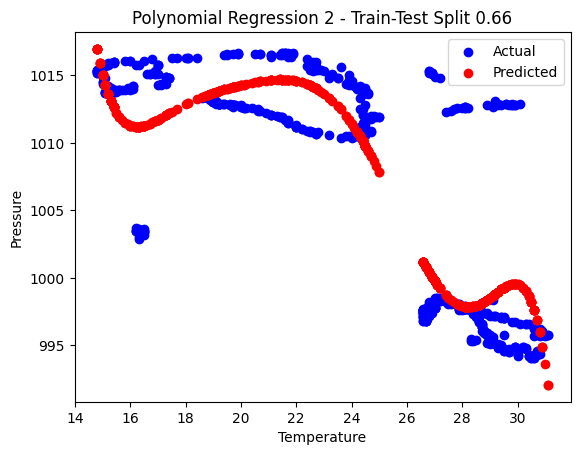

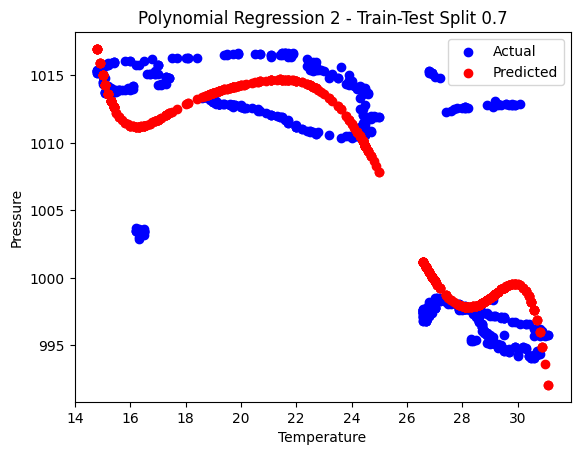

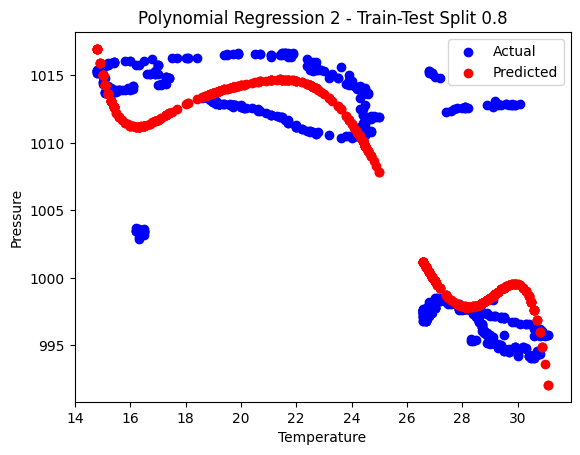

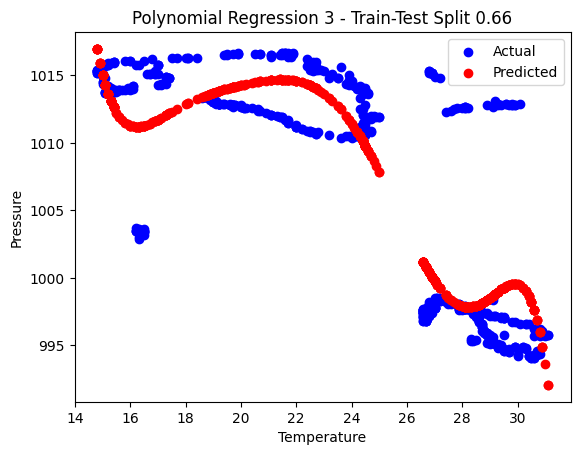

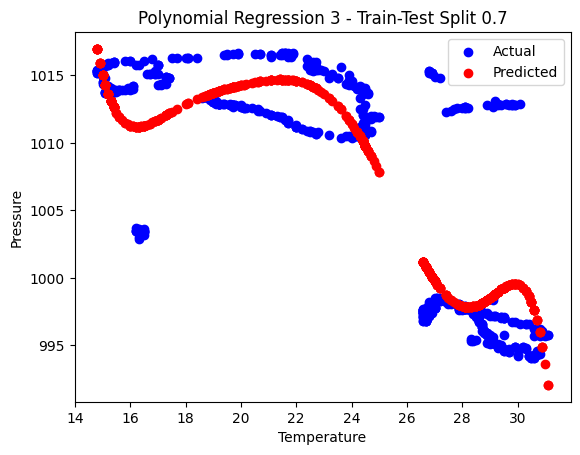

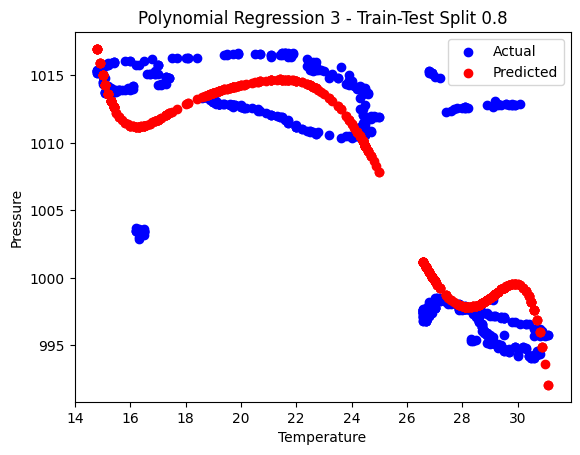

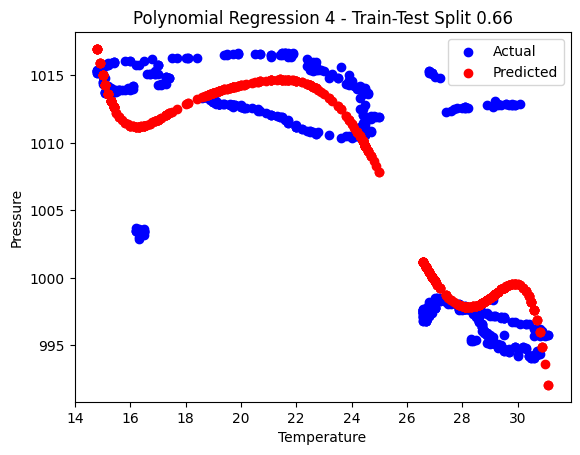

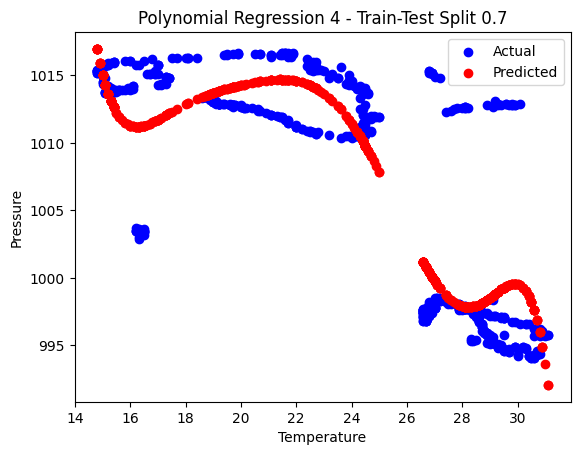

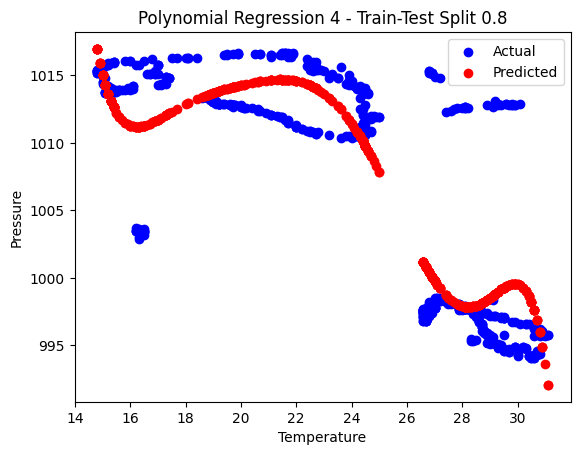

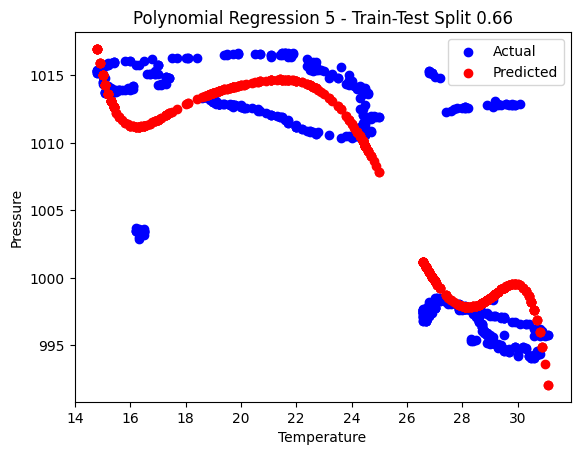

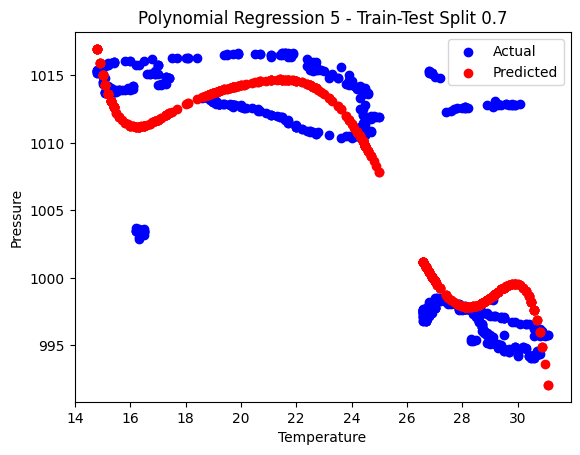

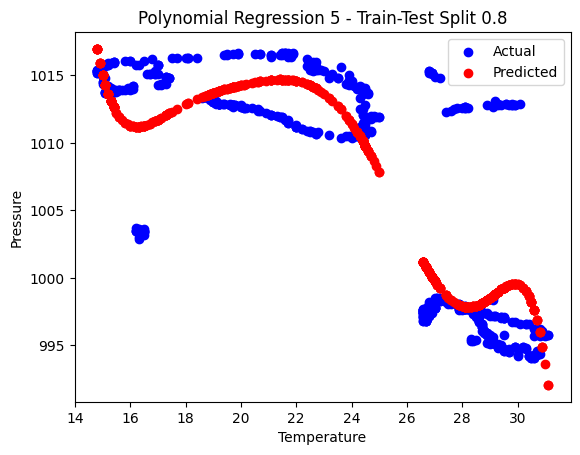

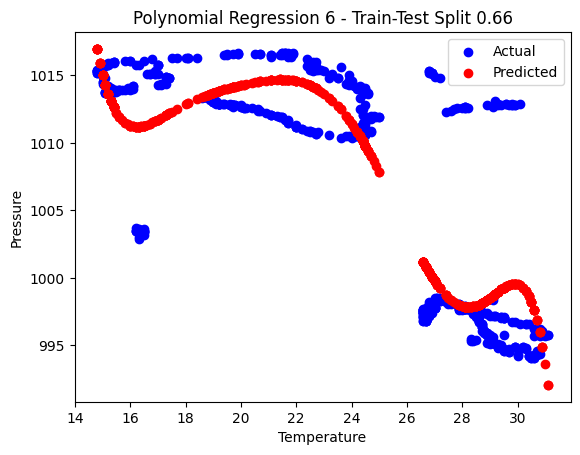

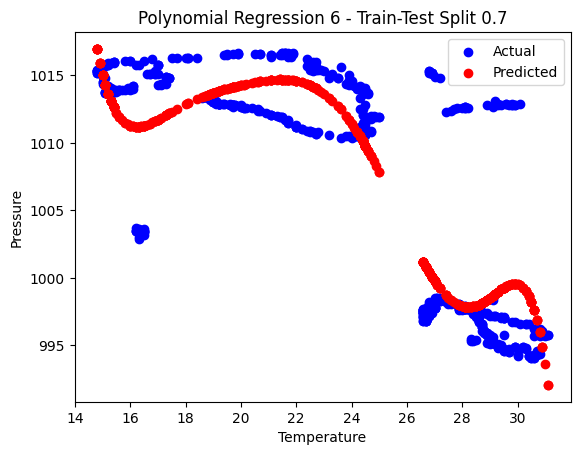

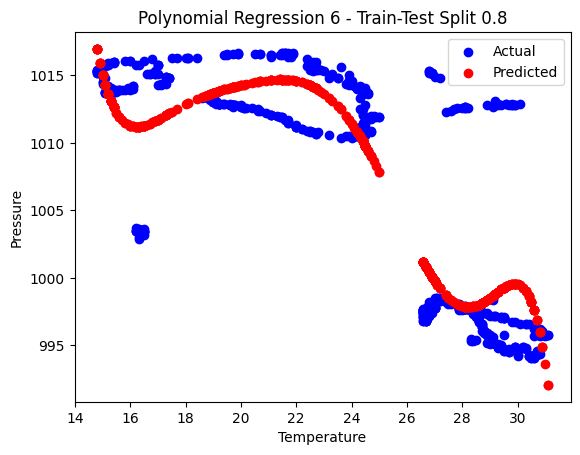

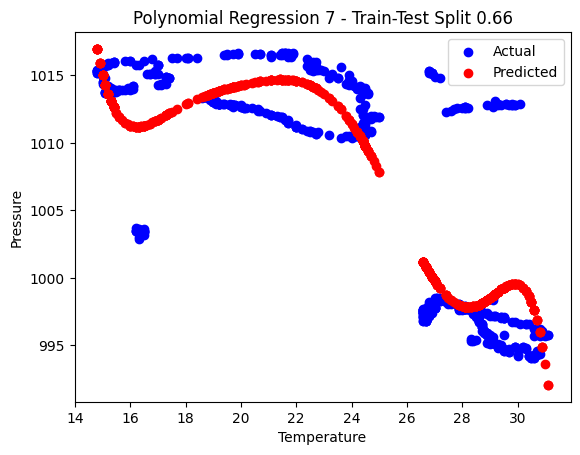

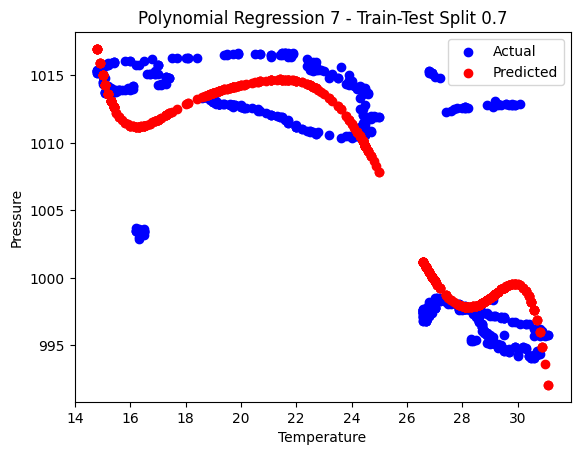

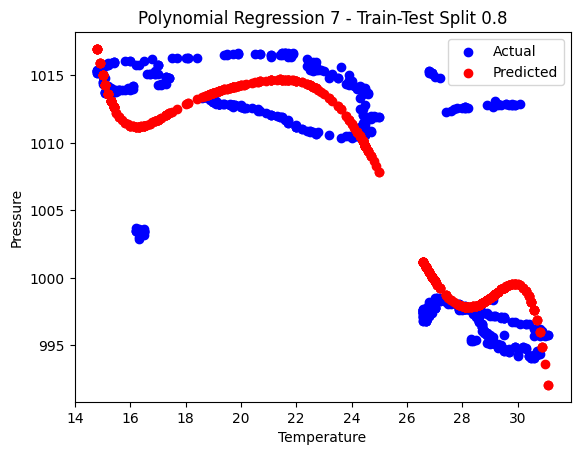

In [11]:
for degree in degrees:
    for split_ratio in split_ratios:
      #if degree == 3 and split_ratio == 0.66:
            plt.scatter(X_test, y_test, color='blue', label='Actual')
            plt.scatter(X_test, y_pred, color='red', label='Predicted')
            plt.xlabel('Temperature')
            plt.ylabel('Pressure')
            plt.legend()
            plt.title('Polynomial Regression ' +str(degree)+ ' - Train-Test Split ' +str(split_ratio))
            plt.show()

From the above Rsquare, MSE values we can infer the following:

As the polynomial degree increases we can see an increase in the Rsquare value as well.


